Firt of all, let's import the necessary librairies

In [13]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now we need to load the data in a dataframe. For the purpose of this project, we'll call it "titanic_df"

In [6]:
titanic_df = pd.read_csv('train.csv')

Let's see what this dataframe looks like

In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [8]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

5.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

6.) Did having a family member increase the odds of surviving the crash?

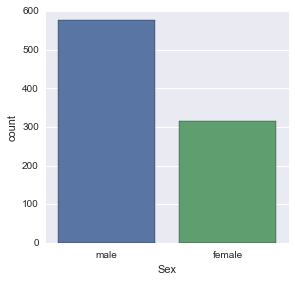

In [20]:
sns.factorplot('Sex',data=titanic_df,kind='count')

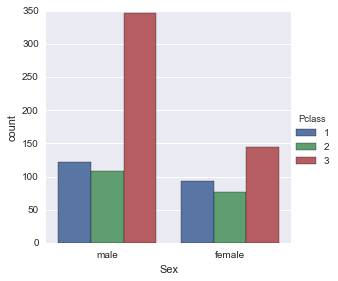

In [21]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind='count')

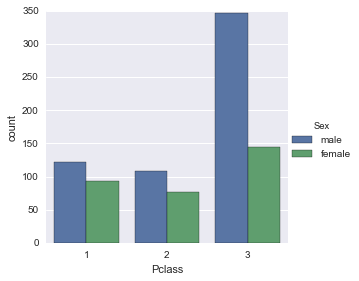

In [22]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

What if we take children into account?

In [26]:
def male_female_child(passenger):
    sex,age = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [30]:
titanic_df['person'] = titanic_df[['Sex','Age']].apply(male_female_child,axis=1)

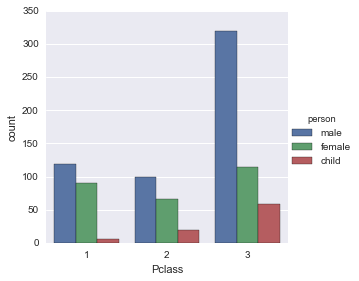

In [33]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119e02f60>]], dtype=object)

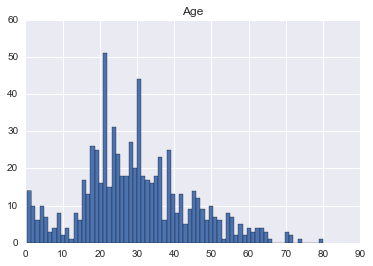

In [37]:
titanic_df.hist(column='Age',bins=70)

In [38]:
titanic_df['Age'].mean()

29.69911764705882

In [40]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

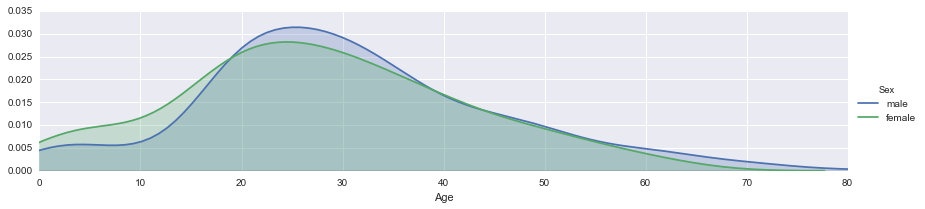

In [48]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

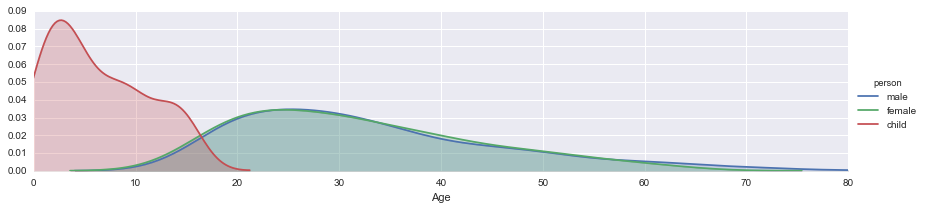

In [47]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

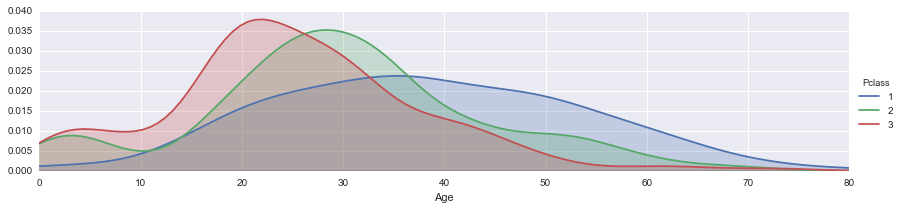

In [46]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

2.) What deck were the passengers on and how does that relate to their class?

In [50]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [51]:
deck = titanic_df['Cabin'].dropna()

In [52]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [53]:
deck = [letter[0] for letter in deck]

In [59]:
cabin_df = DataFrame(deck)
cabin_df.columns = ['Cabin']

In [60]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


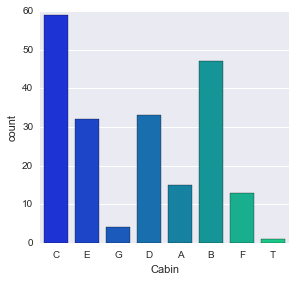

In [65]:
sns.factorplot('Cabin',data=cabin_df,kind='count',palette='winter')

In [66]:
cabin_df = cabin_df[cabin_df != 'T']

In [67]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


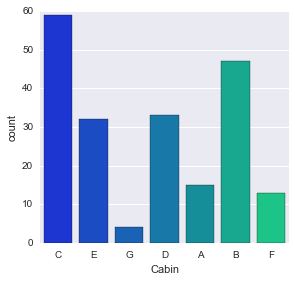

In [68]:
sns.factorplot('Cabin',data=cabin_df,kind='count',palette='winter')

3.) Where did the passengers come from?

In [70]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


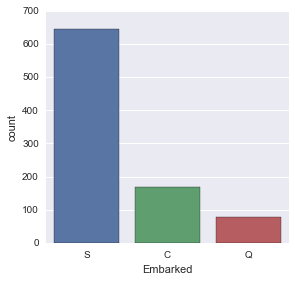

In [71]:
sns.factorplot('Embarked',data=titanic_df,kind='count')

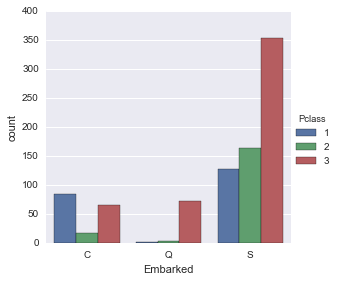

In [76]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

4.) Who was alone and who was with family?

In [77]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [86]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [87]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,0


In [88]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/Users/Mohamed/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [89]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


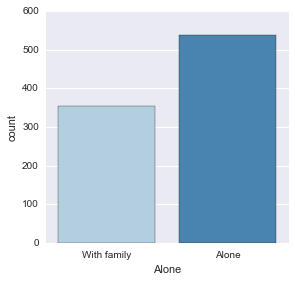

In [93]:
sns.factorplot('Alone',data=titanic_df,kind='count',palette='Blues')

In [94]:
titanic_df['Survivor'] = titanic_df['Survived'].map({0:'no',1:'yes'})

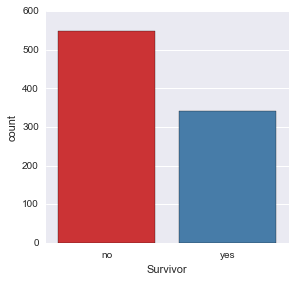

In [98]:
sns.factorplot('Survivor',data=titanic_df,kind='count',palette='Set1')

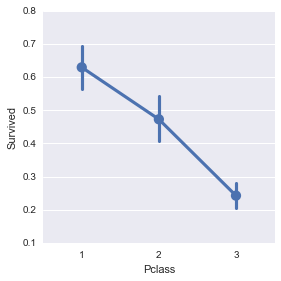

In [102]:
sns.factorplot('Pclass','Survived',data=titanic_df)

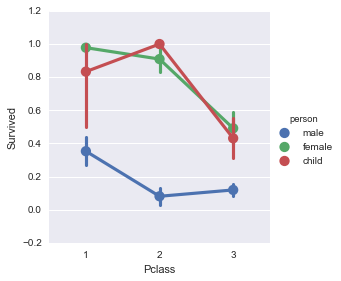

In [103]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

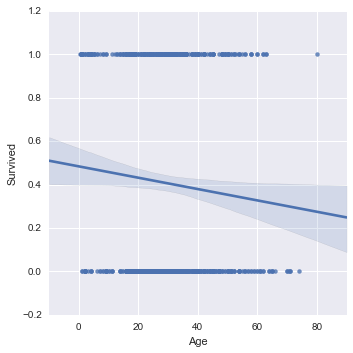

In [104]:
sns.lmplot('Age','Survived',data=titanic_df)

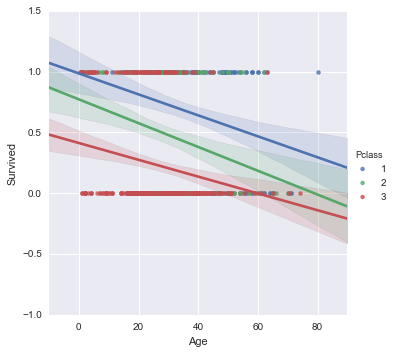

In [105]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df)

In [107]:
generations = [10,20,40,60,80]

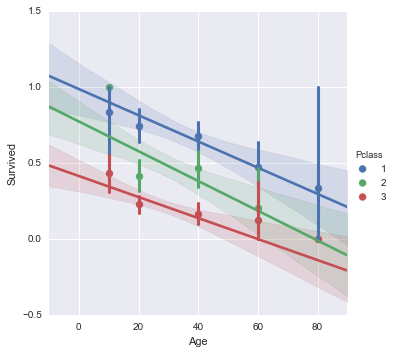

In [108]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations)

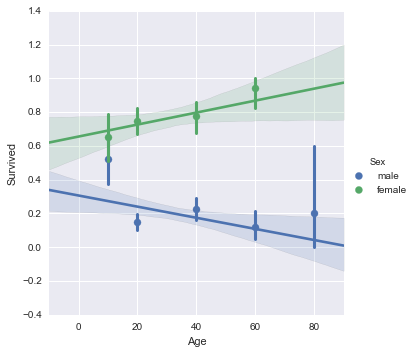

In [110]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations)

5.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

In [114]:
cabin_s = titanic_df[['Survivor','Cabin']].dropna()

In [115]:
cabin_s.head()

,Survivor,Cabin
1,yes,C85
3,yes,C123
6,no,E46
10,yes,G6
11,yes,C103


In [116]:
cabin_s.Cabin = [cabin[0] for cabin in cabin_s.Cabin]
cabin_s = cabin_s[cabin_s.Cabin != 'T']

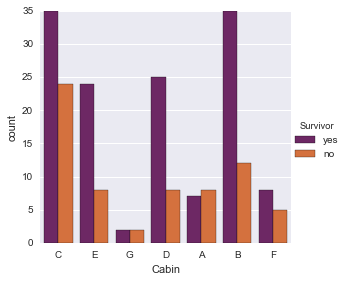

In [117]:
sns.factorplot('Cabin',data=cabin_s,kind='count',hue='Survivor',palette='inferno')

In [118]:
cabin_s.Survivor = cabin_s.Survivor.map({'no':0,'yes':1})

In [119]:
cabin_s.head()

,Survivor,Cabin
1,1,C
3,1,C
6,0,E
10,1,G
11,1,C


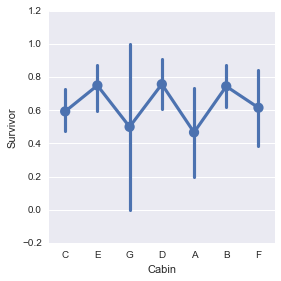

In [120]:
sns.factorplot('Cabin','Survivor',data=cabin_s)

6.) Did having a family member increase the odds of surviving the crash?

In [121]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no


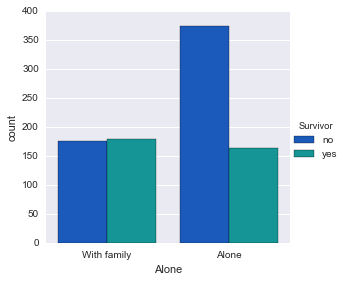

In [122]:
sns.factorplot('Alone',data=titanic_df,kind='count',hue='Survivor',palette='winter')

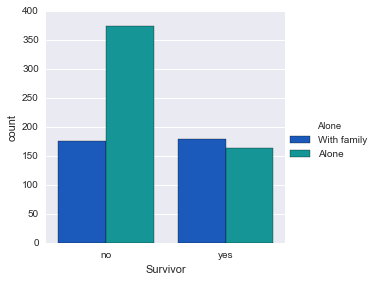

In [123]:
sns.factorplot('Survivor',data=titanic_df,kind='count',hue='Alone',palette='winter')

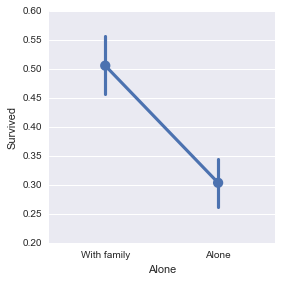

In [124]:
sns.factorplot('Alone','Survived',data=titanic_df)